<a href="https://colab.research.google.com/github/yopiazani02/Deep-Learning/blob/master/Sentiment_Youtube_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEDE** **RAHMAN** **ARIANTO**   [18917109]  
**YOPI** **AZANI**                [19917019] 

#Intro


---



![alt text](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
np.random.seed(7)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load Dataset

`top_words = 5000`

mengatur jumlah maksimum kata yang akan digunakan sebanyak 5000 kata.
batasan jumlah kemunculan satu kata pada document tidak lebih dari 5000.

Ref = https://stackoverflow.com/questions/56880252/using-pre-trained-word-embeddings-in-a-keras-model


---


menentukan data training dan testing dari load data dengan parameter jumlah `top_words`

biasanya pembagian data adalah 80:20 atau 75:25 dengan menambahkan parameter `train_size=0.75,test_size=0.25`

secara default training data dan testing akan dibagi dua 25000 training dan testing.

Ref = https://stackoverflow.com/questions/46495215/what-is-the-difference-between-x-train-and-x-test-in-keras

In [244]:
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/clean_data.csv')
dataset

,Comment,label
0,ayo ayo moga allah swt lindung amin,netral
1,harga sehat patuh anjur perintah sehat sakit,positif
2,update maret malaysia total kes,netral
3,moga yuri sehat ya lelah,positif
4,nurut warga daerah rawan sm himbauan perintah ...,netral
...,...,...
745,santuy badai lalau istri hamil moga aja ga,positif
746,jawa manado jakarta gubernur anies baswedan pe...,netral
747,detik indonesia dapet ranking persentase mati ...,positif
748,jokowi indonesia lockdown,netral


In [0]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
data['Comment'] = str(dataset['Comment'])
data['label'] = str(dataset['label'])
tokenizer.fit_on_texts(dataset['Comment'].values)
X = tokenizer.texts_to_sequences(dataset['Comment'].values)
X = sequence.pad_sequences(X)
# Y = pd.get_dummies(data['label']).values
tokenizer.fit_on_texts(dataset['label'].values)
Y = tokenizer.texts_to_sequences(dataset['label'].values)
Y = sequence.pad_sequences(Y)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense,Activation
import matplotlib.pyplot as plt

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(600, 85) (600, 1)
(150, 85) (150, 1)


In [255]:
max_words = 50
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (600, 50)
input_test shape: (150, 50)


In [264]:
model_RNN = Sequential()
model_RNN.add(Embedding(10000, 32))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_RNN = model_RNN.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)

Train on 480 samples, validate on 120 samples
Epoch 1/5
480/480 [==============================] - 1s 2ms/sample - loss: 0.5446 - acc: 0.3187 - val_loss: 0.4023 - val_acc: 0.3333
Epoch 2/5
480/480 [==============================] - 0s 104us/sample - loss: 0.4041 - acc: 0.3729 - val_loss: 0.3294 - val_acc: 0.3333
Epoch 3/5
480/480 [==============================] - 0s 102us/sample - loss: 0.2976 - acc: 0.3917 - val_loss: 0.2568 - val_acc: 0.3333
Epoch 4/5
480/480 [==============================] - 0s 101us/sample - loss: 0.2012 - acc: 0.3938 - val_loss: 0.1812 - val_acc: 0.3417
Epoch 5/5
480/480 [==============================] - 0s 101us/sample - loss: 0.1085 - acc: 0.3938 - val_loss: 0.1036 - val_acc: 0.3417


In [265]:
loss_RNN, acc_RNN = model_RNN.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 35.33 %
Loss: 12.63 %


LSTM

In [266]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(10000, 32))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_LSTM = model_LSTM.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)   

Train on 480 samples, validate on 120 samples
Epoch 1/5
480/480 [==============================] - 2s 5ms/sample - loss: 0.6986 - acc: 0.1312 - val_loss: 0.6780 - val_acc: 0.2833
Epoch 2/5
480/480 [==============================] - 0s 252us/sample - loss: 0.6774 - acc: 0.3375 - val_loss: 0.6567 - val_acc: 0.3417
Epoch 3/5
480/480 [==============================] - 0s 242us/sample - loss: 0.6556 - acc: 0.3917 - val_loss: 0.6343 - val_acc: 0.3417
Epoch 4/5
480/480 [==============================] - 0s 236us/sample - loss: 0.6329 - acc: 0.3938 - val_loss: 0.6105 - val_acc: 0.3417
Epoch 5/5
480/480 [==============================] - 0s 254us/sample - loss: 0.6087 - acc: 0.3938 - val_loss: 0.5848 - val_acc: 0.3417


In [268]:
loss_LSTM, acc_LSTM = model_LSTM.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f" % (acc_LSTM*100), "%")
print("Loss: %.2f" % (loss_LSTM*100), "%")

Accuracy: 35.33 %
Loss: 58.48 %


In [270]:
model_GRU = Sequential()
model_GRU.add(Embedding(10000,32))
model_GRU.add(GRU(32))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_GRU = model_GRU.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)   

Train on 480 samples, validate on 120 samples
Epoch 1/5
480/480 [==============================] - 2s 4ms/sample - loss: 0.6979 - acc: 0.1458 - val_loss: 0.6811 - val_acc: 0.2333
Epoch 2/5
480/480 [==============================] - 0s 210us/sample - loss: 0.6757 - acc: 0.3083 - val_loss: 0.6604 - val_acc: 0.3250
Epoch 3/5
480/480 [==============================] - 0s 209us/sample - loss: 0.6537 - acc: 0.3812 - val_loss: 0.6395 - val_acc: 0.3417
Epoch 4/5
480/480 [==============================] - 0s 190us/sample - loss: 0.6314 - acc: 0.3938 - val_loss: 0.6181 - val_acc: 0.3417
Epoch 5/5
480/480 [==============================] - 0s 223us/sample - loss: 0.6084 - acc: 0.3938 - val_loss: 0.5959 - val_acc: 0.3417


In [272]:
loss_GRU, acc_GRU = model_GRU.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f" % (acc_GRU*100), "%")
print("Loss: %.2f" % (loss_GRU*100), "%")

Accuracy: 35.33 %
Loss: 59.66 %


In [0]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(10,8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])

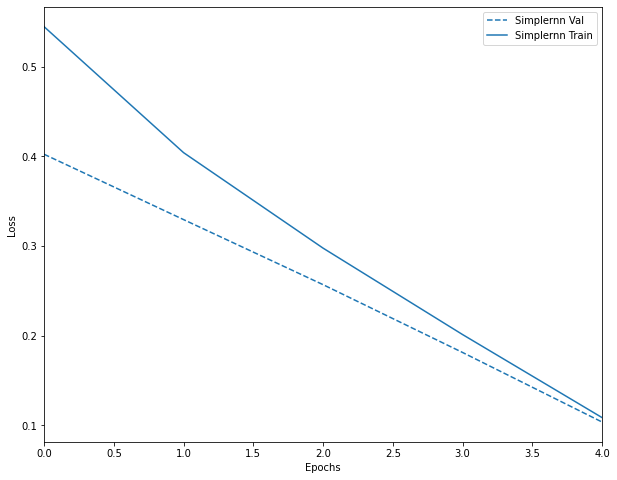

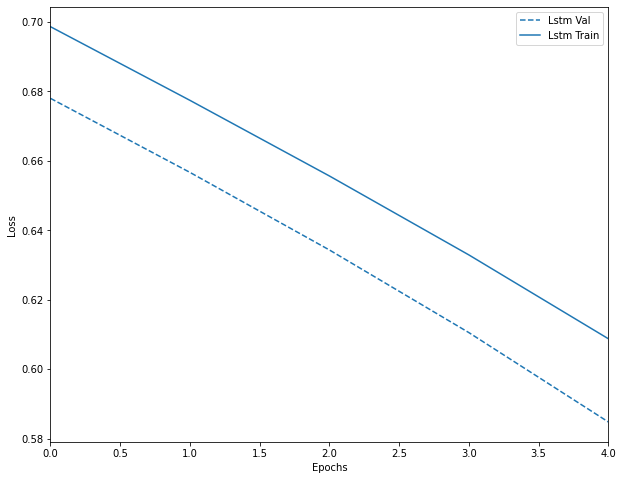

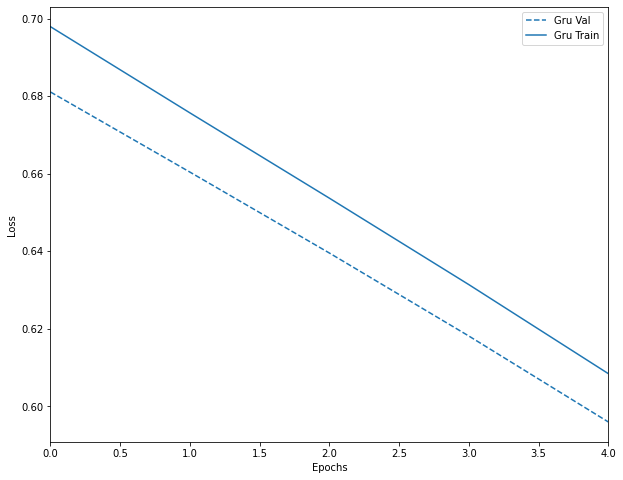

In [274]:
plot_history([('SimpleRNN', history_RNN)])
plot_history([('LSTM', history_LSTM)])
plot_history([('GRU', history_GRU)])

masih mendapatkan akurasi yang kecil, perlu waktu untuk explore lebih jauh lagi